<b><h1>Machine Data and Learning</h1></b>

<h2>Assignment-2<br>
Bias-Variance Trade-off</h2>
<h3> By: Shivam SIngh <br> 2022115003 </h3>


<h5>Task 3: Calculating Bias and Variance </h5>


In [2]:
# import all the req libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from prettytable import PrettyTable

In [3]:
#open giver pickel file
with open('data.pickle', 'rb') as test_file:
    our_data = pickle.load(test_file)

In [4]:
# checking dataset type
print("Datset type:", type(our_data))

Datset type: <class 'dict'>


In [5]:
# keys check to differentiate train and test data
print("Keys for dataset dict:", our_data.keys())

Keys for dataset dict: dict_keys(['train', 'test'])


<b>Task 3.1: You then need to divide the training set into 15 equal parts randomly so that you get 15 different training datasets to train your model </b>

In [6]:
# diffrentialting training and text data from given pickle file
train_data = our_data["train"]
test_data = our_data["test"]
# load training in arr
training_data = np.array(train_data)
# shuffle to randomize
np.random.shuffle(training_data)
# print(shuf_data)
# split in 15 parts
split_data = np.array_split(training_data, 15)
# print arr to check
print(split_data)
print(len(split_data))

[array([[8.40951716e+01, 1.63304637e+01],
       [8.58137467e+01, 1.45958425e+01],
       [2.54965571e+01, 1.98171685e+01],
       [4.55888680e+01, 2.25919425e+01],
       [4.24777329e+01, 2.01063543e+01],
       [9.22698002e+01, 2.25533764e+01],
       [9.88152418e+01, 2.33652175e+01],
       [4.84685458e+01, 1.13639348e+01],
       [2.27137006e+01, 2.64049251e+01],
       [6.21012002e+01, 2.29979217e+01],
       [4.20691914e+01, 2.13941002e+01],
       [1.12809424e+00, 2.16311490e+01],
       [5.49060946e+01, 2.07845771e+01],
       [5.27616117e+01, 1.60844217e+01],
       [2.77580119e+01, 2.39985304e+01],
       [2.03794687e-01, 2.73199794e+01],
       [4.49546794e+01, 1.72227226e+01],
       [6.88780101e+01, 2.46725470e+01],
       [9.69715094e+01, 1.54528637e+01],
       [1.83336925e+01, 2.16668096e+01],
       [7.36921263e+01, 1.14727248e+01],
       [8.92111514e+01, 1.78725876e+01],
       [2.98226449e+01, 1.71953062e+01],
       [1.80327839e+01, 2.05002712e+01],
       [6.51220

In [7]:
# check num of test points in test part
num_test_points = len(test_data)
print("No. of test points:", num_test_points)

No. of test points: 80


In [8]:
# training and req array declaree
# X_train = np.array(train_data)[:, 0].reshape(-1, 1)
y_train = np.array(train_data)[:, 1]
# X_test = np.array(test_data)[:, 0].reshape(-1, 1)
y_test = np.array(test_data)[:, 1]
bias_arr = []
bias2_arr = []
variance_arr = []
irr_err_arr = []
mse_arr = []

<b> Task 3.2:  Now you can calculate the bias and variance of the model using the
test set. You need to repeat the above process for the following class of functions,
1. y = ax + b
2. y = ax<sup>2</sup> + bx + c
3. y = ax<sup>3</sup> + bx<sup>3</sup> + cx + d

And so on, up till polynomials of degree 10.</b>

In [9]:
#claculating evrything
degrees = range(1, 11)

for k in range(1, 11):
    bias = 0
    variance = 0
    mse = 0
    poly = PolynomialFeatures(degree=k)
    x_test = poly.fit_transform(test_data[:, 0].reshape(-1, 1))
    # test points
    mse_each = np.zeros(80)
    y_pred_val = np.zeros((80, 15))
    for i in range(15):
        x_train = poly.fit_transform(split_data[i][:, 0].reshape(-1, 1))
        y_train = split_data[i][:, 1]
        model = LinearRegression().fit(x_train, y_train)
        y_pred_val[:, i] = model.predict(x_test)
        mse_each += (y_test - y_pred_val[:, i]) ** 2
    mse_each = mse_each / 15
    y_pred_avg = np.mean(y_pred_val, axis=1)
    bias = np.mean(abs(y_test - y_pred_avg))
    bias2 = np.mean((y_test - y_pred_avg) ** 2)
    variance = np.mean(
        np.mean((y_pred_val - np.mean(y_pred_val, axis=1).reshape(-1, 1)) ** 2)
    )
    irr_err = np.mean(
        mse_each
        - (y_test - y_pred_avg) ** 2
        - np.mean((y_pred_val - np.mean(y_pred_val, axis=1).reshape(-1, 1)) ** 2)
    )
    irr_err=abs(irr_err)
    mse = np.mean(mse_each)
    print(
        "Degree: "
        + str(k)
        + " Bias: "
        + str(bias)
        + " Variance: "
        + str(variance)
        + " Irr_err: "
        + str(irr_err)
        + " MSE: "
        + str(mse)
    )
    #appendining values 
    bias_arr.append(bias)
    variance_arr.append(variance)
    irr_err_arr.append(irr_err)
    mse_arr.append(mse)
    bias2_arr.append(bias2)

Degree: 1 Bias: 0.8200715010450577 Variance: 0.06260067279398598 Irr_err: 3.6724095986429004e-16 MSE: 1.0660286062236772
Degree: 2 Bias: 0.8094319583146126 Variance: 0.08707951876341342 Irr_err: 3.1710745140856036e-16 MSE: 1.033791904102627
Degree: 3 Bias: 0.09323846359828218 Variance: 0.1599236320394911 Irr_err: 1.2212453270876723e-16 MSE: 0.177680216631654
Degree: 4 Bias: 0.11114945877295865 Variance: 0.1920237519950981 Irr_err: 2.7755575615628915e-18 MSE: 0.2089975887048708
Degree: 5 Bias: 0.10879717801354816 Variance: 0.2197818675499228 Irr_err: 1.9428902930940238e-17 MSE: 0.2358498620966178
Degree: 6 Bias: 0.10406908223463755 Variance: 0.24399046482528727 Irr_err: 1.2212453270876723e-16 MSE: 0.2586357717846794
Degree: 7 Bias: 0.10532343504318753 Variance: 0.280889172918415 Irr_err: 6.38378239159465e-17 MSE: 0.2953629885128287
Degree: 8 Bias: 0.13248716793276033 Variance: 0.2185335157403469 Irr_err: 9.020562075079397e-17 MSE: 0.24537244827587917
Degree: 9 Bias: 0.2016098793399112 V

In [10]:
#table for Bias and Variance
degrees = np.arange(1, 11)
table = PrettyTable()
table.add_column("Degree", degrees)
table.add_column("Bias", bias_arr)
table.add_column("Variance", variance_arr)
print(table)

+--------+---------------------+---------------------+
| Degree |         Bias        |       Variance      |
+--------+---------------------+---------------------+
|   1    |  0.8200715010450577 | 0.06260067279398598 |
|   2    |  0.8094319583146126 | 0.08707951876341342 |
|   3    | 0.09323846359828218 |  0.1599236320394911 |
|   4    | 0.11114945877295865 |  0.1920237519950981 |
|   5    | 0.10879717801354816 |  0.2197818675499228 |
|   6    | 0.10406908223463755 | 0.24399046482528727 |
|   7    | 0.10532343504318753 |  0.280889172918415  |
|   8    | 0.13248716793276033 |  0.2185335157403469 |
|   9    |  0.2016098793399112 |  0.2102544986540852 |
|   10   |  0.3382027223827588 | 0.21338481381299612 |
+--------+---------------------+---------------------+


<b> Task 4: Tabulate the values of irreducible error for the models in Task 3</b>

In [11]:
#table for irr error
table = PrettyTable()
table.add_column("Degree", degrees)
table.add_column("Irreducible Error", irr_err_arr)
print(table)

+--------+------------------------+
| Degree |   Irreducible Error    |
+--------+------------------------+
|   1    | 3.6724095986429004e-16 |
|   2    | 3.1710745140856036e-16 |
|   3    | 1.2212453270876723e-16 |
|   4    | 2.7755575615628915e-18 |
|   5    | 1.9428902930940238e-17 |
|   6    | 1.2212453270876723e-16 |
|   7    |  6.38378239159465e-17  |
|   8    | 9.020562075079397e-17  |
|   9    | 3.0253577421035517e-16 |
|   10   | 2.9698465908722935e-16 |
+--------+------------------------+


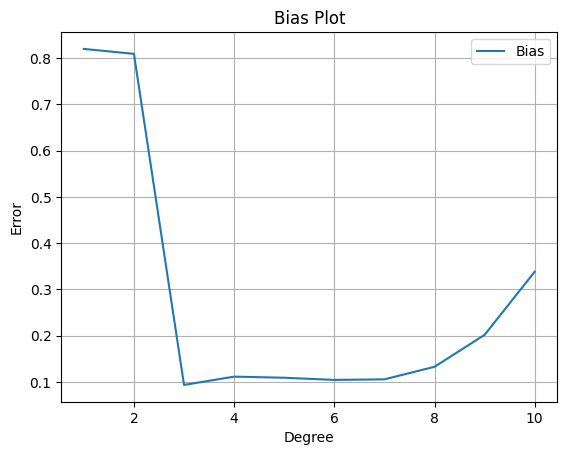

In [12]:
#bias plot
degrees = np.arange(1, 11)
plt.title("Bias Plot")
plt.plot(degrees, bias_arr, label="Bias")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Error")
plt.grid(True)

plt.show()

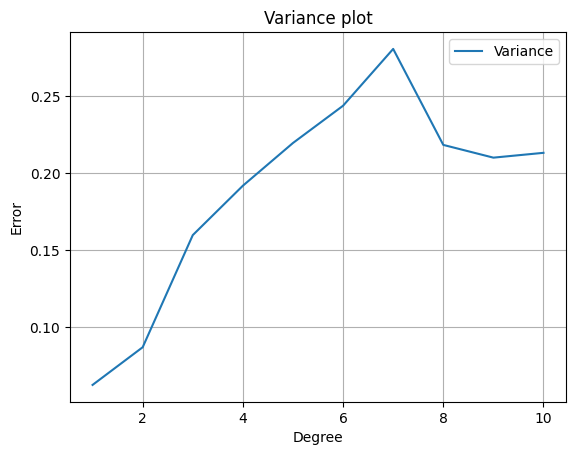

In [13]:
#Varaince plot
degrees = np.arange(1, 11)
plt.plot(degrees, variance_arr, label="Variance")
plt.title("Variance plot")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Error")
plt.grid(True)

plt.show()

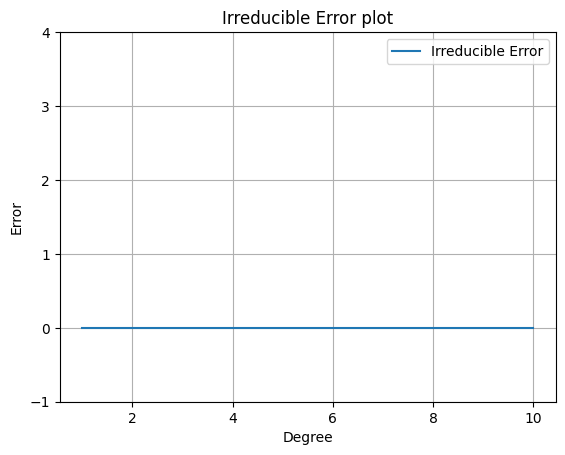

In [14]:
#irr error plot
degrees = np.arange(1, 11)
plt.title("Irreducible Error plot")
plt.plot(degrees, irr_err_arr, label="Irreducible Error")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Error")
plt.ylim(-1, 4)
plt.grid(True)

plt.show()

<b> Task 5: Plotting Bias<sup>2</sup> - Variance Graph</b>

In [15]:
bias_sq_arr = [0] * 10
for i in range(10):
    bias_sq_arr[i] = bias2_arr[i]
var_plot_arr = [0] * 10
for i in range(10):
    var_plot_arr[i] = variance_arr[i]
mse_plot_arr = [0] * 10
for i in range(10):
    mse_plot_arr[i] = mse_arr[i]

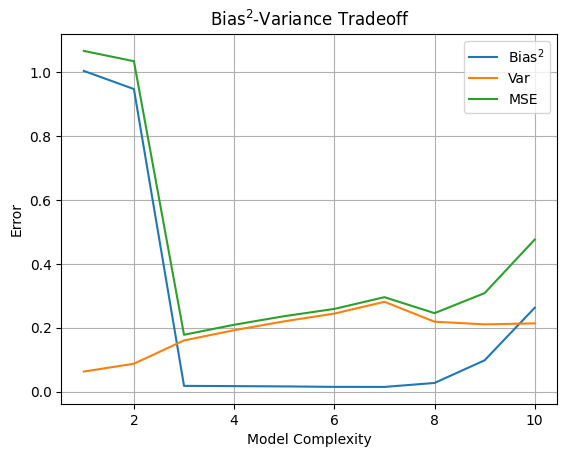

In [16]:
#bias varice tradeoff plot
degree = np.arange(1, 11)
plt.title("Bias$^2$-Variance Tradeoff")
plt.plot(degree, bias_sq_arr, label="Bias$^2$")
plt.plot(degree, var_plot_arr, label="Var")
plt.plot(degree, mse_plot_arr, label="MSE")
plt.legend()
plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.grid(True)

plt.show()